In [17]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# def aspect_ratio(image):
#     '''Calculate the aspect ratio of an image'''
#     return image.shape[1] / image.shape[0]

# def resize_and_pad(image, target_size=(800, 1000)):
#     '''Resize the image while maintaining aspect ratio, then pad to target size'''
#     h, w = image.shape[:2]
#     scale = min(target_size[1] / w, target_size[0] / h)
#     new_w = int(w * scale)
#     new_h = int(h * scale)
#     resized_image = cv2.resize(image, (new_w, new_h))

#     top = (target_size[0] - new_h) // 2
#     bottom = target_size[0] - new_h - top
#     left = (target_size[1] - new_w) // 2
#     right = target_size[1] - new_w - left

#     padded_image = cv2.copyMakeBorder(resized_image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])
#     return padded_image

# def local_adaptive_histogram_equalization(image):
#     '''Apply Local Adaptive Histogram Equalization'''
#     clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
#     return clahe.apply(image)

# def adaptive_thresholding(image):
#     '''Apply Adaptive Thresholding to obtain a binary image'''
#     return cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# def gaussian_blur(image, kernel_size=(5, 5)):
#     '''Apply Gaussian Blur to the image'''
#     return cv2.GaussianBlur(image, kernel_size, 0)

# def canny_edge_detection(image, low_threshold=50, high_threshold=150):
#     '''Apply Canny Edge Detection'''
#     return cv2.Canny(image, low_threshold, high_threshold)

# def find_largest_contour(image):
#     '''Find the largest contour in the binary image'''
#     contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     largest_contour = max(contours, key=cv2.contourArea)
#     return largest_contour

# def apply_affine_transformation(image, contour):
#     '''Apply affine transformation to set perspective using the largest contour'''
#     rect = cv2.minAreaRect(contour)
#     box = cv2.boxPoints(rect)
#     box = np.int_(box)

#     width = int(rect[1][0])
#     height = int(rect[1][1])

#     src_pts = box.astype("float32")
#     dst_pts = np.array([[0, height-1],
#                         [0, 0],
#                         [width-1, 0],
#                         [width-1, height-1]], dtype="float32")

#     M = cv2.getPerspectiveTransform(src_pts, dst_pts)
#     warped = cv2.warpPerspective(image, M, (width, height))
#     return warped

# def preprocess_image(image, target_size=(800, 1000)):
#     '''Complete preprocessing pipeline'''
#     # Step 1: Convert to grayscale
#     gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
#     # Step 2: Adaptive resizing
#     resized_image = resize_and_pad(gray_image, target_size)
    
#     # Step 3: Local Adaptive Histogram Equalization
#     equalized_image = local_adaptive_histogram_equalization(resized_image)
    
#     # Step 4: Adaptive Thresholding
#     binary_image = adaptive_thresholding(equalized_image)
    
#     # Step 5: Gaussian Blur
#     blurred_image = gaussian_blur(binary_image)
    
#     # Step 6: Canny Edge Detection
#     edges = canny_edge_detection(blurred_image)
    
#     # Step 7: Find the largest contour
#     largest_contour = find_largest_contour(edges)
    
#     # Step 8: Apply affine transformation using the largest contour
#     transformed_image = apply_affine_transformation(equalized_image, largest_contour)
    
#     # Step 9: Local Adaptive Histogram Equalization again
#     final_image = local_adaptive_histogram_equalization(transformed_image)
    
#     return final_image

# # # Example usage
# # image = cv2.imread('master_image_cross.jpg')
# # processed_image = preprocess_image(image)
# # cv2.imshow('Processed Image', processed_image)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def aspect_ratio(image):
    '''Calculate the aspect ratio of an image'''
    return image.shape[1] / image.shape[0]

# def resize_and_pad(image, target_size=(800, 1000)):
#     '''Resize the image while maintaining aspect ratio, then pad to target size'''
#     h, w = image.shape[:2]
#     scale = min(target_size[1] / w, target_size[0] / h)
#     new_w = int(w * scale)
#     new_h = int(h * scale)
#     resized_image = cv2.resize(image, (new_w, new_h))

#     top = (target_size[0] - new_h) // 2
#     bottom = target_size[0] - new_h - top
#     left = (target_size[1] - new_w) // 2
#     right = target_size[1] - new_w - left

#     padded_image = cv2.copyMakeBorder(resized_image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])
#     return padded_image

def resize_maintain_aspect_ratio(image, target_size=(800, 1000)):
    '''Resize the image while maintaining aspect ratio, without padding'''
    h, w = image.shape[:2]
    scale = min(target_size[1] / w, target_size[0] / h)
    new_w = int(w * scale)
    new_h = int(h * scale)
    resized_image = cv2.resize(image, (new_w, new_h))
    return resized_image

def local_adaptive_histogram_equalization(image):
    '''Apply Local Adaptive Histogram Equalization'''
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)

def adaptive_thresholding(image):
    '''Apply Adaptive Thresholding to obtain a binary image'''
    # return cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

def gaussian_blur(image, kernel_size=(5, 5)):
    '''Apply Gaussian Blur to the image'''
    return cv2.GaussianBlur(image, kernel_size, 0)

def canny_edge_detection(image, low_threshold=50, high_threshold=150):
    '''Apply Canny Edge Detection'''
    return cv2.Canny(image, low_threshold, high_threshold)

def find_largest_contour(image):
    '''Find the largest contour in the binary image'''
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)
    return largest_contour

def apply_affine_transformation(image, contour):
    '''Apply affine transformation to set perspective using the largest contour'''
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.int_(box)

    width = int(rect[1][0])
    height = int(rect[1][1])

    src_pts = box.astype("float32")
    dst_pts = np.array([[0, height-1],
                        [0, 0],
                        [width-1, 0],
                        [width-1, height-1]], dtype="float32")

    M = cv2.getPerspectiveTransform(src_pts, dst_pts)
    warped = cv2.warpPerspective(image, M, (width, height))
    return warped

def preprocess_image(image, target_size=(800, 1000)):
    '''Complete preprocessing pipeline'''
    # Step 1: Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Step 2: Adaptive resizing
    # resized_image = resize_and_pad(gray_image, target_size)
    resized_image = resize_maintain_aspect_ratio(gray_image, target_size)    
    # Step 3: Local Adaptive Histogram Equalization
    equalized_image = local_adaptive_histogram_equalization(resized_image)
    
    # Step 4: Adaptive Thresholding
    binary_image = adaptive_thresholding(equalized_image)
    
    # Step 5: Gaussian Blur
    blurred_image = gaussian_blur(binary_image)
    
    # Step 6: Canny Edge Detection
    edges = canny_edge_detection(blurred_image)
    
    # Step 7: Find the largest contour
    largest_contour = find_largest_contour(edges)
    
    # Step 8: Apply affine transformation using the largest contour
    transformed_image = apply_affine_transformation(equalized_image, largest_contour)
    
    # Step 9: Local Adaptive Histogram Equalization again
    final_image = local_adaptive_histogram_equalization(transformed_image)
    
    return final_image

# Example usage
# image = cv2.imread('scanned_answer_sheet.jpg')
# processed_image = preprocess_image(image)

# # Display the final processed image using Matplotlib
# plt.imshow(processed_image, cmap='gray')
# plt.axis('off')  # Hide axes
# plt.show()


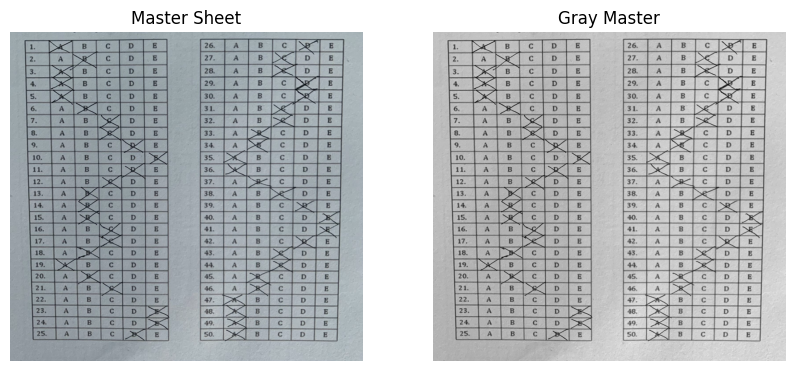

In [66]:
ori_img = cv2.imread('master_image_cross.jpg')
gray_ori = cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.imshow(ori_img, cmap='gray')
plt.title('Master Sheet')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_ori, cmap='gray')
plt.title('Gray Master')
plt.axis('off')

plt.show()

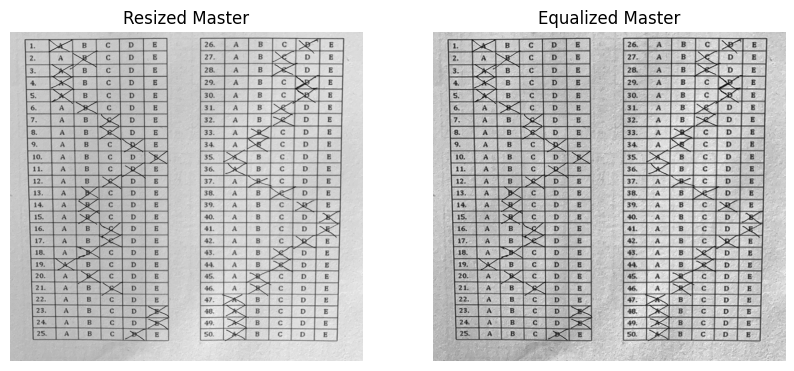

In [67]:
resized_image = resize_maintain_aspect_ratio(gray_ori)
equalized_image = local_adaptive_histogram_equalization(resized_image)

plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.imshow(resized_image, cmap='gray')
plt.title('Resized Master')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Master')
plt.axis('off')

plt.show()

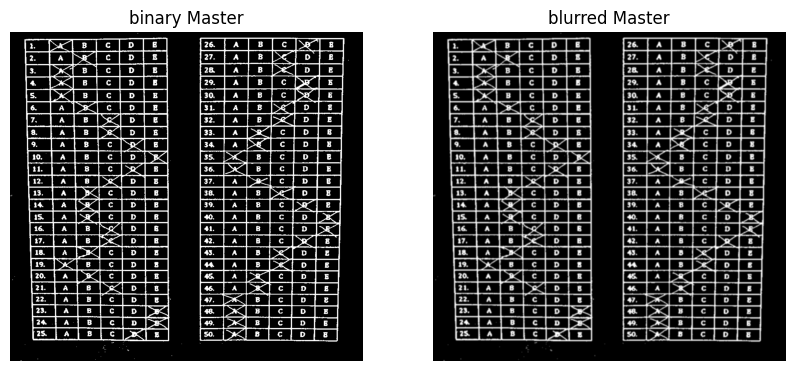

In [68]:
_, binary_image = adaptive_thresholding(equalized_image)
blurred_image = gaussian_blur(binary_image)

plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('binary Master')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('blurred Master')
plt.axis('off')

plt.show()

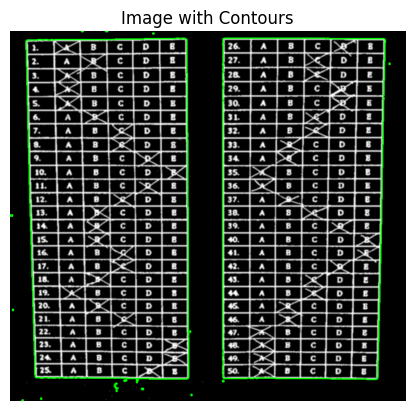

In [69]:
# edges = canny_edge_detection(blurred_image)
# # largest_contour = find_largest_contour(edges)
# contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# print(edges)
# # print(largest_contour)
# print(contours)

# Your previous code
edges = canny_edge_detection(blurred_image)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_image = cv2.cvtColor(blurred_image, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR for color drawing
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Draw contours in green color

# Display the image with contours
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours')
plt.axis('off')  # Hide axes
plt.show()

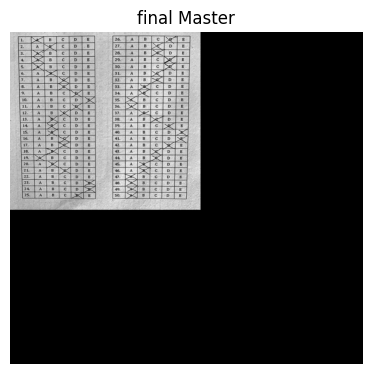

In [70]:
def find_bounding_boxes(contours):
    '''Find bounding boxes for all contours'''
    bounding_boxes = [cv2.boundingRect(contour) for contour in contours]
    return bounding_boxes

def get_combined_bounding_box(bounding_boxes):
    '''Get combined bounding box that encompasses all individual bounding boxes'''
    x_min = min([box[0] for box in bounding_boxes])
    y_min = min([box[1] for box in bounding_boxes])
    x_max = max([box[0] + box[2] for box in bounding_boxes])
    y_max = max([box[1] + box[3] for box in bounding_boxes])
    return (x_min, y_min, x_max, y_max)

def apply_perspective_transformation(image, bounding_box):
    '''Apply perspective transformation to set perspective using the combined bounding box'''
    x_min, y_min, x_max, y_max = bounding_box

    # Define source points from the bounding box
    src_pts = np.array([[x_min, y_min], [x_max, y_min], [x_max, y_max], [x_min, y_max]], dtype="float32")

    # Define destination points for the perspective transformation
    width = x_max - x_min
    height = y_max - y_min
    dst_pts = np.array([[0, 0], [width, 0], [width, height], [0, height]], dtype="float32")

    # Get the perspective transformation matrix and apply it
    M = cv2.getPerspectiveTransform(src_pts, dst_pts)
    warped = cv2.warpPerspective(image, M, (width, height))
    return warped

boxes = find_bounding_boxes(contours)
combined_boxes = get_combined_bounding_box(boxes)
transformed_image = apply_perspective_transformation(equalized_image, combined_bounding_box)

plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.imshow(transformed_image, cmap='gray')
plt.title('final Master')
plt.axis('off')

plt.show()

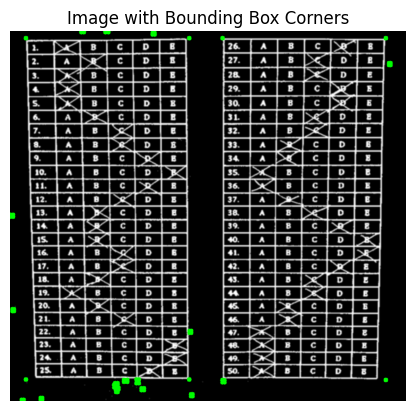

In [58]:
# Your previous code
edges = canny_edge_detection(blurred_image)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Convert the grayscale image to BGR for color drawing
contour_image = cv2.cvtColor(blurred_image, cv2.COLOR_GRAY2BGR)

# Loop over the contours to draw only the corners
for contour in contours:
    # Get the bounding box of the contour
    x, y, w, h = cv2.boundingRect(contour)
    
    # Draw circles at the corners of the bounding box
    cv2.circle(contour_image, (x, y), 5, (0, 255, 0), -1)  # Top-left corner
    cv2.circle(contour_image, (x + w, y), 5, (0, 255, 0), -1)  # Top-right corner
    cv2.circle(contour_image, (x, y + h), 5, (0, 255, 0), -1)  # Bottom-left corner
    cv2.circle(contour_image, (x + w, y + h), 5, (0, 255, 0), -1)  # Bottom-right corner

# Display the image with corners
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Bounding Box Corners')
plt.axis('off')  # Hide axes
plt.show()

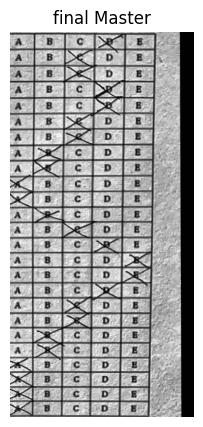

In [62]:
transformed_image = apply_affine_transformation(equalized_image, largest_contour)
final_image = local_adaptive_histogram_equalization(transformed_image)

plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.imshow(final_image, cmap='gray')
plt.title('final Master')
plt.axis('off')

plt.show()

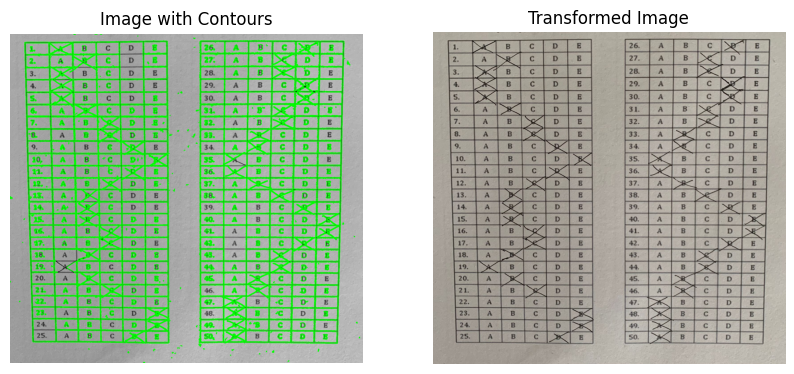

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny_edge_detection(image, low_threshold=50, high_threshold=150):
    '''Apply Canny Edge Detection'''
    return cv2.Canny(image, low_threshold, high_threshold)

def find_bounding_boxes(contours):
    '''Find bounding boxes for all contours'''
    bounding_boxes = [cv2.boundingRect(contour) for contour in contours]
    return bounding_boxes

def get_combined_bounding_box(bounding_boxes):
    '''Get combined bounding box that encompasses all individual bounding boxes'''
    x_min = min([box[0] for box in bounding_boxes])
    y_min = min([box[1] for box in bounding_boxes])
    x_max = max([box[0] + box[2] for box in bounding_boxes])
    y_max = max([box[1] + box[3] for box in bounding_boxes])
    return (x_min, y_min, x_max, y_max)

def apply_perspective_transformation(image, bounding_box):
    '''Apply perspective transformation to set perspective using the combined bounding box'''
    x_min, y_min, x_max, y_max = bounding_box

    # Define source points from the bounding box
    src_pts = np.array([[x_min, y_min], [x_max, y_min], [x_max, y_max], [x_min, y_max]], dtype="float32")

    # Define destination points for the perspective transformation
    width = x_max - x_min
    height = y_max - y_min
    dst_pts = np.array([[0, 0], [width, 0], [width, height], [0, height]], dtype="float32")

    # Get the perspective transformation matrix and apply it
    M = cv2.getPerspectiveTransform(src_pts, dst_pts)
    warped = cv2.warpPerspective(image, M, (width, height))
    return warped

# Load your image
image = cv2.imread('master_image_cross.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Example preprocessing steps
# (Include your actual preprocessing steps here)
edges = canny_edge_detection(gray)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_image = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR for color drawing
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Draw contours in green color

# Find bounding boxes for all contours
bounding_boxes = find_bounding_boxes(contours)

# Get combined bounding box
combined_bounding_box = get_combined_bounding_box(bounding_boxes)

# Apply perspective transformation using the combined bounding box
transformed_image = apply_perspective_transformation(image, combined_bounding_box)

# Display the image with contours
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours')
plt.axis('off')

# Display the transformed image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.title('Transformed Image')
plt.axis('off')

plt.show()